In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *
from pyndamics import Simulation
from pyndamics.emcee import *

Version 0.0.2
pyndamics version  0.0.8


In [16]:
susceptible_data = np.array([999,997,996,994,993,992,990,989,986,984])
infected_data = np.array([1,2,5,6,7,8,9,11,13,15])
t_data=np.array([0,1,2,3,4,5,6,7,8,9])

In [22]:
sim=Simulation()
sim.add("N=S+I+R")
sim.add(" S' = -β*S*I/N",1000)
sim.add(" I' = +β*S*I/N - γ*I",1)
sim.add(" R' = +γ*I",0)
sim.add_data(t=t_data,S=susceptible_data)
sim.add_data(t=t_data,I=infected_data)
sim.params(β=0.3,γ=0.1)
sim.run(0,10)

Text(0, 0.5, 'I')

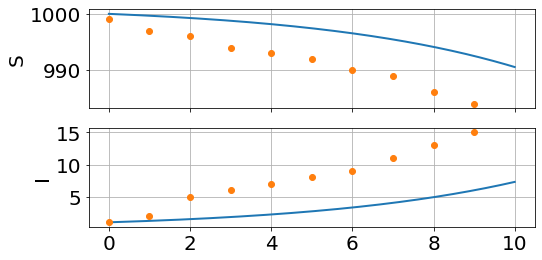

In [23]:
figure(figsize=(8,4))

t,S,I=sim.t,sim.S,sim.I

subplot(2,1,1)
plot(t,S,'-') # models plotted with solid line
plot(t_data,susceptible_data,'o') # data with markers
ylabel('S')
gca().set_xticklabels([])

subplot(2,1,2)
plot(t,I,'-')  # models plotted with solid line
plot(t_data,infected_data,'o') # data with markers
ylabel('I')



let's make the statistical model

In [24]:
model=MCMCModel(sim,
               β=Uniform(0,1),
               γ=Uniform(0,1))

Sampling Prior...
Done.
0.56 s
Running MCMC...
Done.
52.18 s


<Figure size 864x576 with 0 Axes>

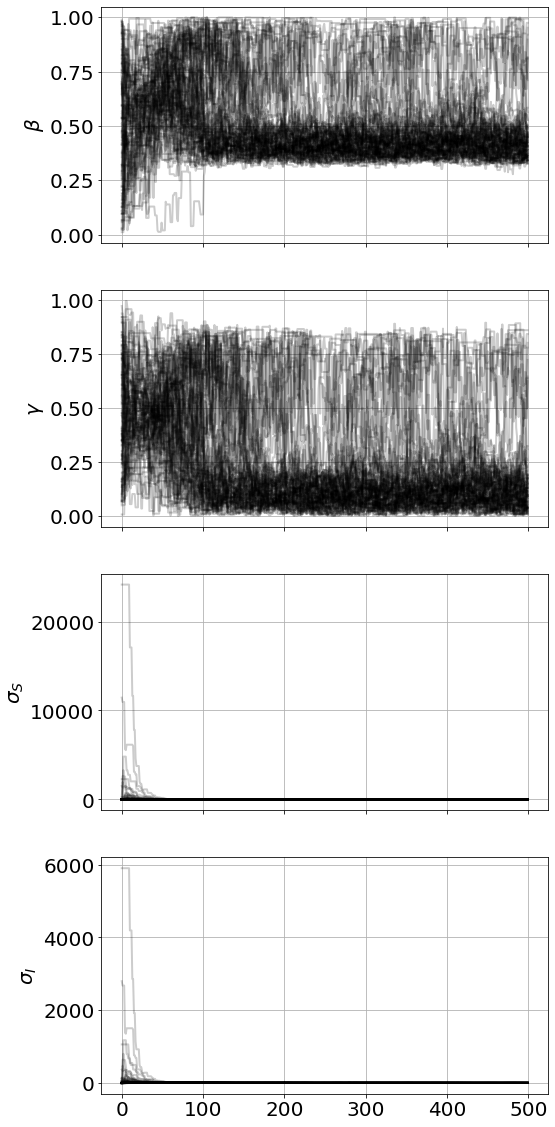

In [25]:
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
56.83 s


<Figure size 864x576 with 0 Axes>

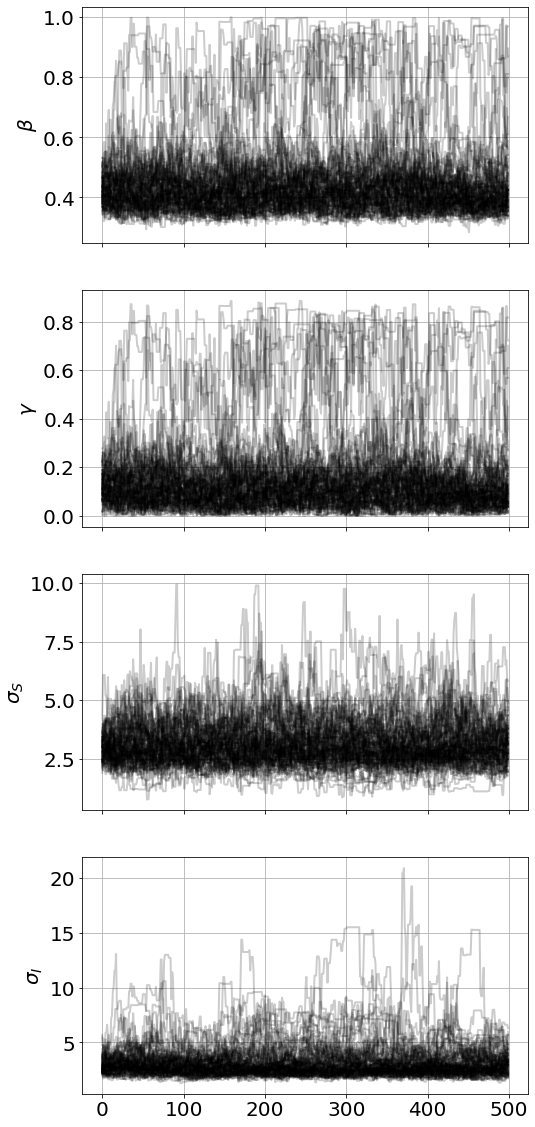

In [26]:
model.set_initial_values('samples')  # reset using the 16-84 percentile values from the samples
model.run_mcmc(500)
model.plot_chains()

Text(0, 0.5, 'I')

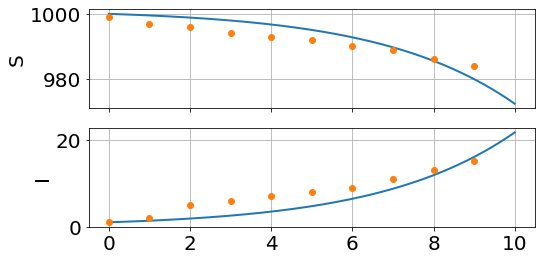

In [28]:
sim.run(0,10)

figure(figsize=(8,4))

t,S,I=sim.t,sim.S,sim.I

subplot(2,1,1)
plot(t,S,'-') # models plotted with solid line
plot(t_data,susceptible_data,'o') # data with markers
ylabel('S')
gca().set_xticklabels([])

subplot(2,1,2)
plot(t,I,'-')  # models plotted with solid line
plot(t_data,infected_data,'o') # data with markers
ylabel('I')



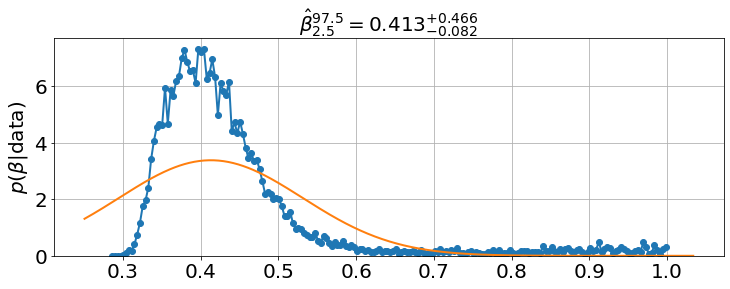

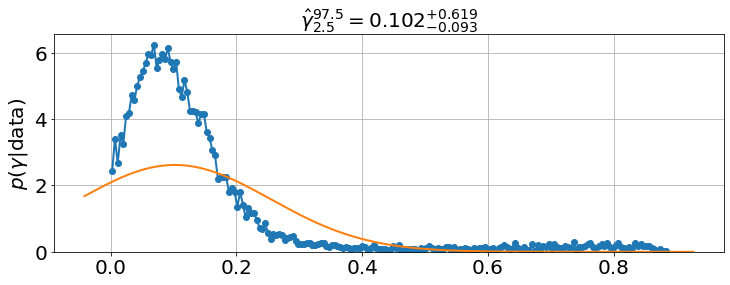

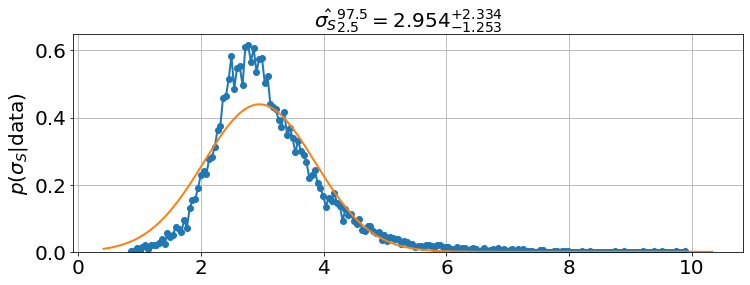

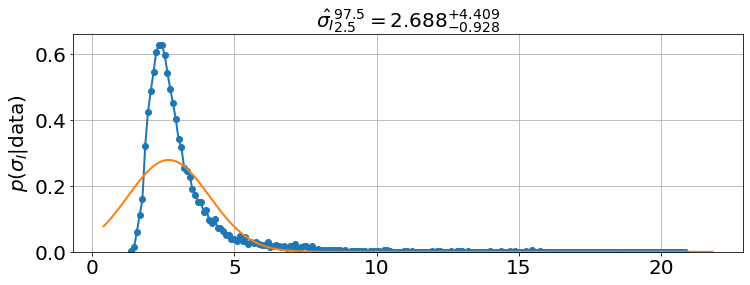

In [29]:
model.plot_distributions()